Sources of Data:
    
https://www.kaggle.com/datasets

https://archive.ics.uci.edu/ml/datasets.php

https://cloud.google.com/bigquery/public-data

https://medium.com/@ODSC/15-open-datasets-for-healthcare-830b19980d9

https://data.world/datasets/health

https://www.gdeltproject.org/

In [11]:
import pandas as pd
import numpy as np 

from pandas_profiling import ProfileReport
# https://github.com/pandas-profiling/pandas-profiling 

In [14]:
# Pandas Tool

# Rows selection -- done
# Columns Selection -- done

# FillNA -- done 
# FFILL -- done
# bfill -- done
# mean -- done
# subslicing
# group  -- done
# agg -- done
# sorting  -- done
# head tail -- done
# sns factorplot -- not sure how this works
# seaborn factorplot
# pearson correlation coefficient -- done 

# cross validations -- later
# bias variance curve -- later


# Pandas Resource

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html



In [49]:
df = pd.read_csv('cardio_train.csv',sep=';')

In [60]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [36]:
df.head(15) # top 15 , gives 5 automatically

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [37]:
df.tail(15)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69985,99977,18194,1,156,102.0,130,80,1,1,0,1,0,1
69986,99978,18198,2,180,78.0,120,80,1,1,0,0,1,0
69987,99979,18852,1,151,49.0,120,80,1,1,0,0,1,0
69988,99981,21978,1,160,59.0,110,70,1,1,0,0,1,0
69989,99985,21013,1,157,83.0,120,70,1,1,0,0,1,1
69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,1
69991,99988,20609,1,159,72.0,130,90,2,2,0,0,1,0
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1


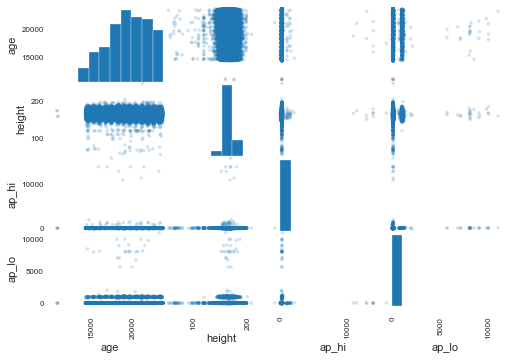

In [63]:
pd.plotting.scatter_matrix(df[['age','height','ap_hi','ap_lo']], alpha=0.2);

In [40]:
df[['age','height','weight']].agg(['sum', 'min','mean'])

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html

,age,height,weight
sum,1.362821e+09,1.150515e+07,5.194398e+06
min,1.079800e+04,5.500000e+01,1.000000e+01
mean,1.946887e+04,1.643592e+02,7.420569e+01


In [41]:
df.sort_values(by='gender', ascending=False)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
54156,77243,20450,2,163,103.0,120,80,1,1,0,0,1,0
54195,77288,19676,2,173,75.0,120,80,1,1,0,0,1,0
24322,34754,22475,2,166,84.0,110,70,1,1,0,0,1,0
24319,34749,18279,2,167,54.0,120,80,1,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28409,40623,18920,1,156,78.0,120,80,1,1,0,0,0,1
28414,40631,19128,1,170,69.0,120,80,1,1,0,0,1,0
28416,40633,22572,1,160,82.0,110,90,2,1,0,0,1,0
28417,40634,22127,1,158,68.0,120,80,1,1,0,0,1,0


In [25]:
profile = ProfileReport(df, title="Pandas Profiling Report")

# word of caution, works on smaller datasets under 100k rows, on a bigger dataset, we can have a sample

In [24]:
profile

- python and pandas primer

In [26]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

# Column Selection

- pick columns that you want

In [32]:
df[['id', 'age', 'gender', 'height', 'weight']]

,id,age,gender,height,weight
0,0,18393,2,168,62.0
1,1,20228,1,156,85.0
2,2,18857,1,165,64.0
3,3,17623,2,169,82.0
4,4,17474,1,156,56.0
...,...,...,...,...,...
69995,99993,19240,2,168,76.0
69996,99995,22601,1,158,126.0
69997,99996,19066,2,183,105.0
69998,99998,22431,1,163,72.0


# Row Selection

In [34]:
df.iloc[0:100]

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,129,21076,1,158,53.0,110,70,1,1,0,0,1,0
96,131,19258,2,165,65.0,110,70,1,1,0,0,1,0
97,132,18410,1,165,99.0,150,110,1,1,0,0,0,1
98,133,21860,2,170,100.0,120,80,1,1,0,0,0,1


# Group By

In [31]:
df.groupby(by=["gender"]).mean()

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html 

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,,
1,49898.345267,19510.124577,161.355612,72.565605,128.139249,94.522776,1.384735,1.235054,0.017856,0.025500,0.802021,0.496727
2,50110.246547,19392.097875,169.947895,77.257307,130.078872,100.551982,1.333633,1.210462,0.218880,0.106375,0.806906,0.505231


# slice DF with only Male Gender

In [50]:
male = df[df['gender']== 2]
male.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
11,16,18815,2,173,60.0,120,80,1,1,0,0,1,0
12,18,14791,2,165,60.0,120,80,1,1,0,0,0,0


In [54]:
df[df['weight'] < 100]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# & statement

In [59]:
df[(df['weight'] < 100) & (df['weight'] > 40)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Making labels

- find a column of interest that you want to be your target variable ( will this person become infected or not?)

- Convert that to 1 or 0 for Machine Learning Readability

In [5]:
case_outcomes = ['Infected','Not Infected','Infected']

binary_case = [1 if case == 'Infected' else 0 for case in case_outcomes]

binary_case

[1, 0, 1]

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Infected','Not Infected','Infected'])
le.transform(['Infected','Not Infected','Infected'])

# does the 

array([0, 1, 0])

# Preprocessing with SQL

CASE WHEN cases='Infected' THEN 1 ELSE 0 END as cases_binary

# Dummy Variables

In [3]:
pd.get_dummies(pd.Series(['Sick','Very Sick','Mildy Sick']), dtype=float)

,Mildy Sick,Sick,Very Sick
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0


# Dealing with Missing Data

Why deal with missing data?

If there is missing data in the dataset, the machine learning model will not be able to accept data for model processing.  

There are a few strategies with dealing with missing data for machine learning inputs.

# DropNA

- any row that has a missing value, that row will be dropped

In [ ]:
df = pd.DataFrame(columns = ['height'])
df['height'] = [60,65,np.nan,55,70]
df.dropna()

1) FillNA

You can fill the missing values with a blank value the mean of the values

In [46]:
df = pd.DataFrame(columns = ['height'])
df['height'] = [60,65,np.nan,55,70]

In [47]:
# fill with mean values

df.height.fillna(np.mean(df['height']))

0    60.0
1    65.0
2    62.5
3    55.0
4    70.0
Name: height, dtype: float64

In [43]:
# .ffill() 

# function is used to fill the missing value in the dataframe. ‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.

In [44]:
df = pd.DataFrame(columns = ['height'])
df['height'] = [60,65,np.nan,55,70]
df.ffill()

,height
0,60.0
1,65.0
2,65.0
3,55.0
4,70.0


In [45]:
df = pd.DataFrame(columns = ['height'])
df['height'] = [60,65,np.nan,55,70]
df.bfill()

,height
0,60.0
1,65.0
2,55.0
3,55.0
4,70.0


# Deciding to Drop a column or row

- if there only a few bad rows, then we can drop rows
- if there are too many missing rows, consider dropping columns

In [19]:
df = pd.DataFrame(columns = [])
df['height'] = [60,65,np.nan,55,70]
df['weight'] = [np.nan,np.nan,np.nan,np.nan,70]

# since there are too many missing rows in weight, we can drop the column altogether 

In [20]:
df.pop('weight')

0     NaN
1     NaN
2     NaN
3     NaN
4    70.0
Name: weight, dtype: float64